In [1]:
# http://flothesof.github.io/smile-recognition.html
from sklearn import datasets
from pylab import *
faces = datasets.fetch_olivetti_faces()

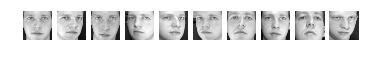

In [2]:
%matplotlib inline
for i in range(10):
    face = faces.images[i]
    subplot(1, 10, i + 1)
    imshow(face.reshape((64, 64)), cmap='gray')
    axis('off')

In [3]:
# instantiate class
from ipywidgets import widgets
from IPython.display import display, clear_output
class Trainer:
    def __init__(self):
        self.results = {}
        self.imgs = faces.images
        self.index = 0
        
    def increment_face(self):
        if self.index + 1 >= len(self.imgs):
            return self.index
        else:
            while str(self.index) in self.results:
                print self.index
                self.index += 1
            return self.index
    
    def record_result(self, smile=True):
        self.results[str(self.index)] = smile

trainer = Trainer()

button_smile = widgets.Button(description='smile')
button_no_smile = widgets.Button(description='no smile')

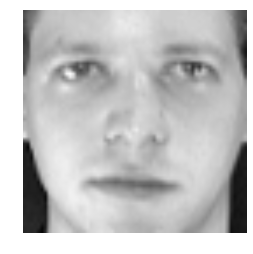

In [4]:
# create user interface
def display_face(face):
    clear_output()
    imshow(face, cmap='gray')
    axis('off')

def update_smile(b):
    trainer.record_result(smile=True)
    trainer.increment_face()
    display_face(trainer.imgs[trainer.index])

def update_no_smile(b):
    trainer.record_result(smile=False)
    trainer.increment_face()
    display_face(trainer.imgs[trainer.index])

button_no_smile.on_click(update_no_smile)
button_smile.on_click(update_smile)

display(button_smile)
display(button_no_smile)
display_face(trainer.imgs[trainer.index])

In [11]:
import json
# write the results into the file
# THIS WILL OVERWRITE THE PREVIOUS FILE!
with open('results.xml', 'w') as f:
    json.dump(trainer.results, f)

In [5]:
import json
# read the existing file
trainer.results = json.load(open('results.xml'))

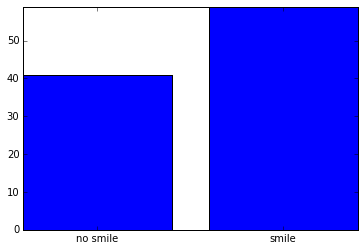

In [6]:
yes, no = (sum([trainer.results[x] == True for x in trainer.results]), 
            sum([trainer.results[x] == False for x in trainer.results]))
bar([0, 1], [no, yes])
ylim(0, max(yes, no))
xticks([0.4, 1.4], ['no smile', 'smile']);

In [7]:
# smile classifier
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem

svc_1 = SVC(kernel='linear') # initialize
indices = [i for i in trainer.results]
data = faces.data[indices, :] # image data
target = [trainer.results[i] for i in trainer.results]
target = array(target).astype(int32) # target vector

# train the smile classifier
X_train, X_test, y_train, y_test = train_test_split(
        data, target, test_size=0.25, random_state=0)
def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold cross validation iterator
    cv = KFold(len(y), K, shuffle=True, random_state=0)
    # by default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print (scores)
    print ("Mean score: {0:.3f} (+/-{1:.3f})".format(
        np.mean(scores), sem(scores)))



C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: DeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future


In [8]:
# evaluate the classifier's performance
evaluate_cross_validation(svc_1, X_train, y_train, 5)

[ 0.86666667  0.86666667  0.93333333  0.86666667  0.8       ]
Mean score: 0.867 (+/-0.021)


In [9]:
# confusion matrix shows the errors the classifier made
from sklearn import metrics

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print ("Accuracy on training set:")
    print (clf.score(X_train, y_train))
    print ("Accuracy on testing set:")
    print (clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    print ("Classification Report:")
    print (metrics.classification_report(y_test, y_pred))
    print ("Confusion Matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))
    
train_and_evaluate(svc_1, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.84
Classification Report:
             precision    recall  f1-score   support

          0       0.78      0.78      0.78         9
          1       0.88      0.88      0.88        16

avg / total       0.84      0.84      0.84        25

Confusion Matrix:
[[ 7  2]
 [ 2 14]]


this person is smiling: [ True]


C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


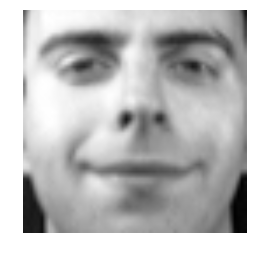

In [10]:
# GUI for showing the face and the classifier's classification
random_image_button = widgets.Button(description="New image!")

def display_face_and_prediction(b):
    index = randint(0, 400)
    face = faces.images[index]
    display_face(face)
    print("this person is smiling: {0}".format(svc_1.predict(faces.data[index, :])==1))

random_image_button.on_click(display_face_and_prediction)
display(random_image_button)
display_face_and_prediction(0)

In [15]:
gray

<function matplotlib.pyplot.gray>